# Heart Diease

## reference

In [123]:
# https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/heart.csv

## Import Libraries

In [124]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, SelectKBest

## Import Dataset

In [125]:
# age
# sex
# chest pain type (4 values)
# resting blood pressure
# serum cholestoral in mg/dl
# fasting blood sugar > 120 mg/dl
# resting electrocardiographic results (values 0,1,2)
# maximum heart rate achieved
# exercise induced angina
# oldpeak = ST depression induced by exercise relative to rest
# the slope of the peak exercise ST segment
# number of major vessels (0-3) colored by flourosopy
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# The names and social security numbers of the patients were recently removed from the database, replaced with dummy values


path = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/heart.csv'
heart = pd.read_csv(path)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [126]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## split target and features

In [127]:
# splitt the data into traing and test 
y = heart.target
cond = heart.columns == 'target'
col_na = heart.columns[~cond]
X = heart[col_na]

## reduce features ( infomation gain)

In [128]:
ig = mutual_info_regression
k = 6
myfit = SelectKBest(ig,k = 6)
myfit.fit_transform(X, y)
importance = myfit.scores_
names = myfit.feature_names_in_
rd = pd.DataFrame({'features' : names, 'score' : importance}).sort_values(by = 'score', ascending = False)
rd = rd.iloc[0:k,:]
rd

,features,score
4,chol,0.271101
7,thalach,0.156378
11,ca,0.120457
2,cp,0.116936
12,thal,0.116757
9,oldpeak,0.109941


In [129]:
# find the feature name 
select_name = list(rd.features)
select_name
# find the new data which only contain selected columns 
X_new = pd.DataFrame(X[select_name])
X_new

,chol,thalach,ca,cp,thal,oldpeak
0,212,168,2,0,3,1.0
1,203,155,0,0,3,3.1
2,174,125,0,0,3,2.6
3,203,161,1,0,3,0.0
4,294,106,3,0,2,1.9
...,...,...,...,...,...,...
1020,221,164,0,1,2,0.0
1021,258,141,1,0,3,2.8
1022,275,118,1,0,2,1.0
1023,254,159,0,0,2,0.0


## Split the data into training and test 

In [130]:
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2)

## Gradient Boosting 

In [131]:
model = GradientBoostingClassifier(loss = 'log_loss', n_estimators = 100, criterion = 'squared_error')
# fit the model
model.fit(X_new_train, y_train)

GradientBoostingClassifier(criterion='squared_error')

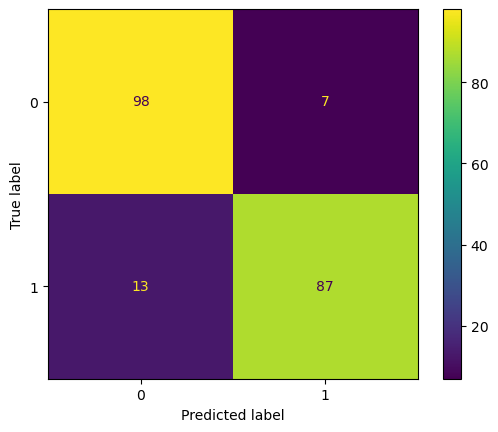

In [132]:
# predit the results
y_pred = model.predict(X_new_test)
# confusion metrics
cm = confusion_matrix(y_test, y_pred)
dis = ConfusionMatrixDisplay(cm)
dis.plot()
plt.show()



## Accuracy

In [133]:
accuracy_score(y_test, y_pred)


0.9024390243902439

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       105
           1       0.93      0.87      0.90       100

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



## AUC 

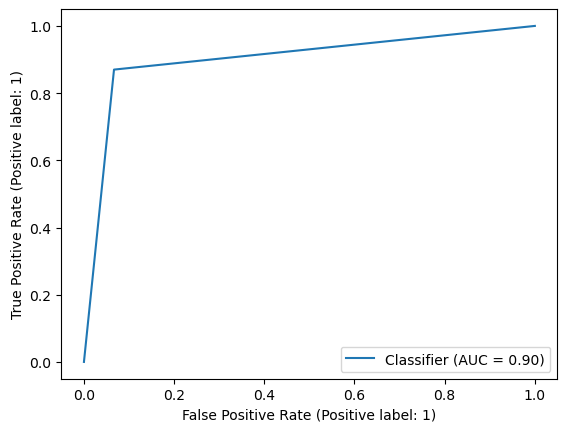

In [136]:
# roc-auc plot
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()